## Importing Packages and Modules

In [1]:
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import time
import os
from datetime import timedelta
import keras

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.0.0


Using TensorFlow backend.


## Loading Data

In [3]:
h5f = h5py.File('MNIST_synthetic.h5','r')

X_train = h5f['train_dataset'][:]
y_train = h5f['train_labels'][:]
X_val = h5f['valid_dataset'][:]
y_val = h5f['valid_labels'][:]
X_test = h5f['test_dataset'][:]
y_test = h5f['test_labels'][:]

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

h5f.close()

Training set (37500, 64, 64, 1) (37500, 5)
Validation set (2500, 64, 64, 1) (2500, 5)
Test set (10000, 64, 64, 1) (10000, 5)


## Analysing Data

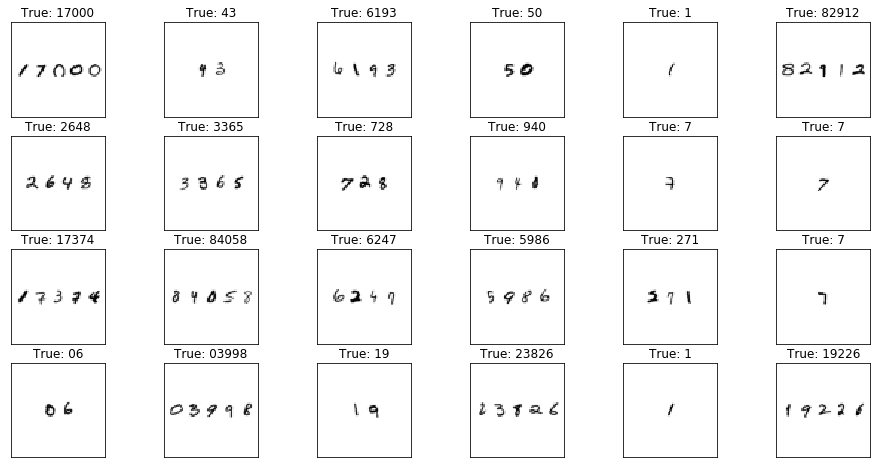

In [4]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    
    # Initialize figure
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    
    for i, ax in enumerate(axes.flat): 
        
        # Pretty string with actual number
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        title = "True: {0}".format(true_number)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)   
        ax.set_xticks([]);
        ax.set_yticks([])
        
        
# Plot some sample images
plot_images(X_train, 4, 6, y_train);

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes = 11)
y_val = keras.utils.to_categorical(y_val, num_classes = 11)
y_test = keras.utils.to_categorical(y_test, num_classes = 11)

(37500, 5, 11)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Loading Model

In [ ]:
# load json and create model
from keras.models import model_from_json
json_file = open('mnistmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("mnistmodel.h5")
print("Loaded model from disk")

In [7]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss=[
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    ], metrics=['accuracy','accuracy','accuracy','accuracy','accuracy'])


In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          activation_1[0][0]               
____________________________________________________________________________________________

In [ ]:
modelDataHistory = model.fit(x=X_train,y=[y[0],y[1],y[2],y[3],y[4]],epochs = 40,batch_size=64, validation_data=(X_val,[yval[0],yval[1],yval[2],yval[3],yval[4]]))

In [9]:
print(y_val.shape)
print(X_train.shape)
y = np.ndarray(shape=(5,37500,11))
for i in range(y_train.shape[0]):
    for j in range(y_train.shape[1]):
        y[j][i] = y_train[i][j]
yval = np.ndarray(shape=(5,2500,11))
for i in range(y_val.shape[0]):
    for j in range(y_val.shape[1]):
        yval[j][i] = y_val[i][j]
ytest = np.ndarray(shape=(5,10000,11))
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[1]):
        ytest[j][i] = y_test[i][j]
print(y.shape,yval.shape,ytest.shape)

(2500, 5, 11)
(37500, 64, 64, 1)
(5, 37500, 11) (5, 2500, 11) (5, 10000, 11)


## Evaluating Model

In [13]:
score = model.evaluate(x=X_test,y=[ytest[0],ytest[1],ytest[2],ytest[3],ytest[4]])

10000/10000 [==============================] - 22s 2ms/step


In [14]:
accuracy =0;
print('------------------------------------------------------------------------')
for i in range(6,11):
    accuracy += score[i]
    print('Accuracy for ',(i-5),'digit\'s position is: ',score[i]*100,"%")
print('------------------------------------------------------------------------')
print('Overall accuracy of model for all five positions is: ',accuracy/5*100,'%')

------------------------------------------------------------------------
Accuracy for  1 digit's position is:  98.47999811172485 %
Accuracy for  2 digit's position is:  98.37999939918518 %
Accuracy for  3 digit's position is:  98.72999787330627 %
Accuracy for  4 digit's position is:  99.16999936103821 %
Accuracy for  5 digit's position is:  99.73000288009644 %
------------------------------------------------------------------------
Overall accuracy of model for all five positions is:  98.89799952507019 %


In [15]:
eg = np.zeros(shape=(500,64,64,1))
for i in range(500):
    eg[i] = X_test[i]
arr = model.predict(eg)

In [16]:
yhash = np.ndarray(shape = (500,5,11))
for i in range(500):
    for j in range(5):
        yhash[i][j] = arr[j][i]

yactual = np.ndarray(shape = (500,5,11))
for i in range(500):
    for j in range(5):
        yactual[i][j] = ytest[j][i]

[3.44901435e-19 2.08305731e-16 1.00000000e+00 8.88986411e-19
 5.38138392e-22 1.18369713e-25 1.84023207e-19 7.96602537e-19
 8.46198076e-20 2.69315092e-29 1.29407705e-37]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Helper function to convert categorical data to numerical data
def num(a):
    number = np.argmax(a[0])
    for i in range(4):
        if np.argmax(a[i+1])< 10:
            number = number*10
            number = number + np.argmax(a[i+1])
    return number

## Plotting some images with true and predected values

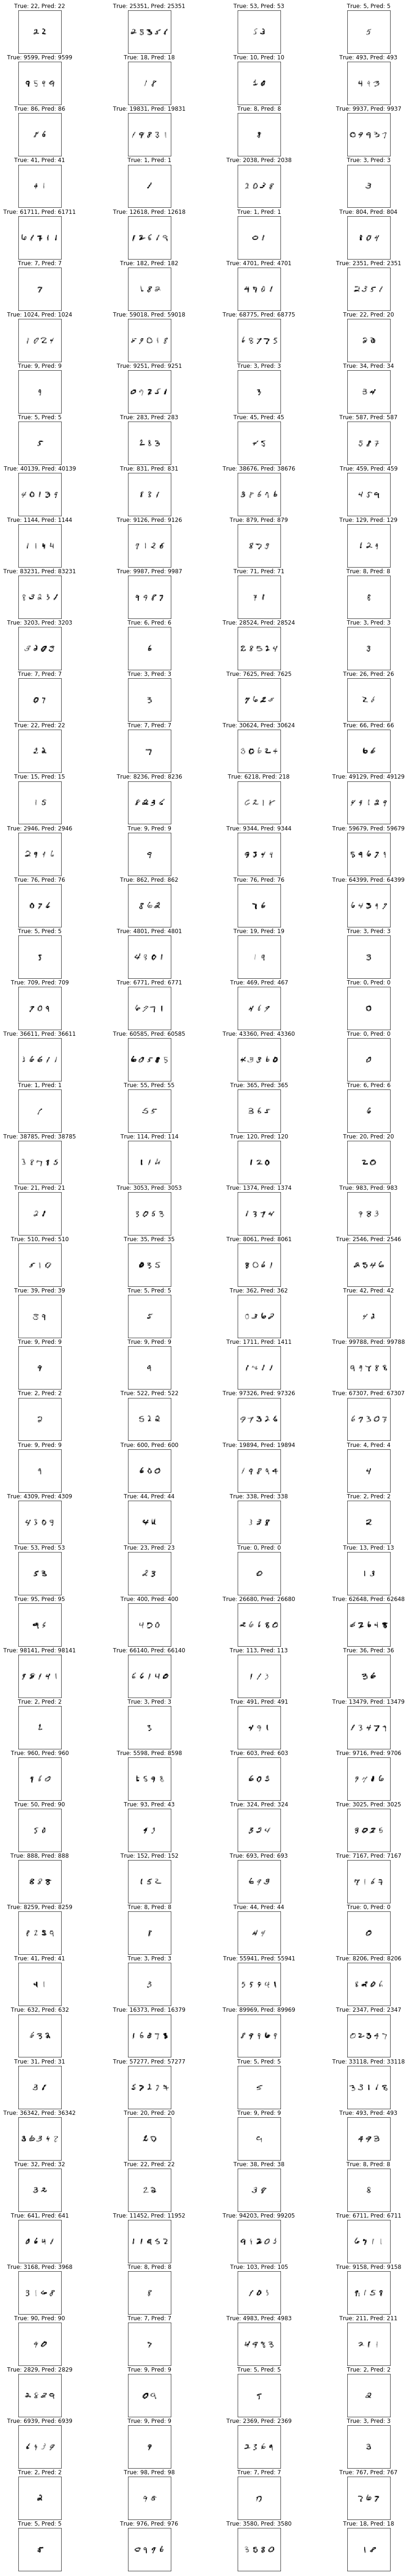

In [18]:
fig, axes = plt.subplots(50, 4, figsize=(16, 2*50))

for i, ax in enumerate(axes.flat): 
        
        true_number = num(y_test[i][:])
        pred_number = num(yhash[i][:])
        title = "True: {0}, Pred: {1}".format(true_number, pred_number) 
            
        ax.imshow(eg[i,:,:,0], cmap='binary')
        ax.set_title(title)   
        ax.set_xticks([]);
        ax.set_yticks([])

In [ ]:
his = modelDataHistory.historyb

In [ ]:
trainaccuracy = pd.DataFrame({"Position 1":list(his['dense_2_accuracy']),"Position 2":list(his['dense_3_accuracy'])
                             ,"Position 3":list(his['dense_4_accuracy']),"Position 4":list(his['dense_5_accuracy'])
                             ,"Position 5":list(his['dense_6_accuracy'])})
Valaccuracy = pd.DataFrame({"Position 1":list(his['val_dense_2_accuracy']),"Position 2":list(his['val_dense_3_accuracy'])
                             ,"Position 3":list(his['val_dense_4_accuracy']),"Position 4":list(his['val_dense_5_accuracy'])
                             ,"Position 5":list(his['val_dense_6_accuracy'])})

In [ ]:
plt.plot(his['dense_2_accuracy'])
plt.plot(his['dense_3_accuracy'])
plt.plot(his['dense_4_accuracy'])
plt.plot(his['dense_5_accuracy'])
plt.plot(his['dense_6_accuracy'])
plt.title('model train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0)
plt.legend(['Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5'], loc=4)
plt.show()

In [ ]:
plt.plot(his['val_dense_2_accuracy'])
plt.plot(his['val_dense_3_accuracy'])
plt.plot(his['val_dense_4_accuracy'])
plt.plot(his['val_dense_5_accuracy'])
plt.plot(his['val_dense_6_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7)
plt.legend(['Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5'], loc=4)
plt.show()